In [7]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Загрузка данных
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Удаляем столбец Class
train_df.drop(columns=['Class'], inplace=True)

# Объединяем оба DataFrame
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Удаляем строки с NaN
combined_df = combined_df.dropna()

# Проверяем, что больше нет NaN
print(combined_df.isnull().sum())


Area               0
MajorAxisLenght    0
MinorAxisLenght    0
Eccentricity       0
Orientation        0
ConvexArea         0
FilledArea         0
EulerNumber        0
EquivDiameter      0
Solidity           0
Extent             0
Perimeter          0
dtype: int64


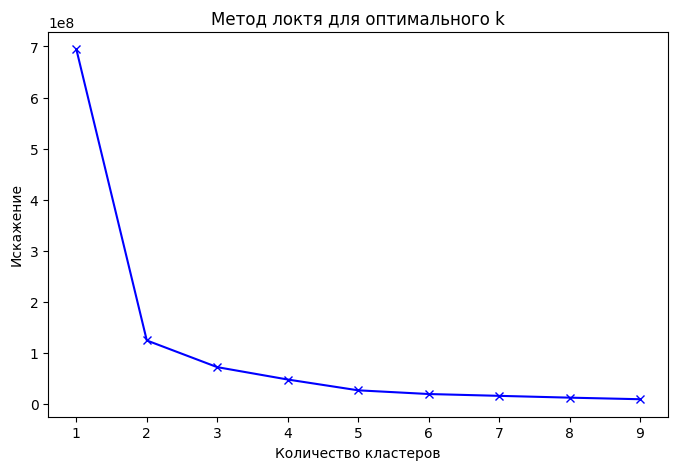

In [10]:
def optimal_k_method_elbow(data):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=2000, n_init=10, random_state=42)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Искажение')
    plt.title('Метод локтя для оптимального k')
    plt.show()

optimal_k_method_elbow(combined_df)

In [12]:
# Кластеризация KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=2000, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(combined_df)
silhouette_kmeans = silhouette_score(combined_df, y_kmeans)
print(f'Силуэт для KMeans: {silhouette_kmeans}')

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=100)
y_dbscan = dbscan.fit_predict(combined_df)
# Исключаем шумовые точки (-1) из оценки силуэта
y_dbscan_filtered = y_dbscan[y_dbscan != -1]
dbscan_points = combined_df[y_dbscan != -1]
silhouette_dbscan = silhouette_score(dbscan_points, y_dbscan_filtered)
print(f'Силуэт для DBSCAN: {silhouette_dbscan}')

Силуэт для KMeans: 0.8003419279598747


ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required.